# Logistic regression

In this exercise you will train a logistic regression model via gradient descent in two simple scenarios.
 
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{0,1\}$ is the target,
* for a given $x$ we model the probability of $y=1$ by $h(x):=g(w^Tx)$, where $g$ is the sigmoid function: $g(z) = \frac{1}{1+e^{-z}}$,
* to find the right $w$ we will optimize the so called logarithmic loss: $J(w) = -\frac{1}{n}\sum_{i=1}^n y_i \log{h(x_i)} + (1-y_i) \log{(1-h(x_i))}$,
* with the loss function in hand we can improve our guesses iteratively:
    * $w_j^{t+1} = w_j^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_j}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with the simplest example - linear separated points on a plane. 

In [ ]:
%matplotlib inline

import numpy as np

np.random.seed(123)

# these parametrize the line
a = 0.3
b = -0.2
c = 0.001

# 1/0 mapping
def lin_rule(x, noise=0.):
    return int(a * x[0] + b * x[1] + c + noise < 0.)

# Just for plotting
def get_y_fun(a, b, c):
    def y(x):
        return - x * a / b - c / b
    return y

lin_fun = get_y_fun(a, b, c)

In [ ]:
# Training data

n = 500
range_points = 1
sigma = 0.05

X = np.array(range_points * 2 * (np.random.rand(n, 2) - 0.5))
y = np.array([lin_rule(x, sigma * np.random.normal()) for x in X])

print(X[:10])
print(y[:10])

[[ 0.39293837 -0.42772133]
 [-0.54629709  0.10262954]
 [ 0.43893794 -0.15378708]
 [ 0.9615284   0.36965948]
 [-0.0381362  -0.21576496]
 [-0.31364397  0.45809941]
 [-0.12285551 -0.88064421]
 [-0.20391149  0.47599081]
 [-0.63501654 -0.64909649]
 [ 0.06310275  0.06365517]]
[0 1 0 0 0 1 0 1 1 0]


Let's plot the data.

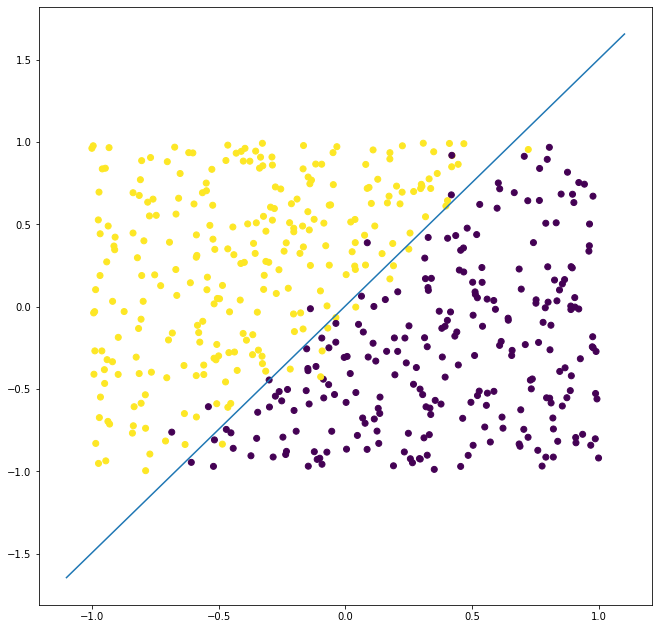

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

range_plot = 1.1
h = .002

plt.figure(figsize=(11,11))

plt.scatter(X[:, 0], X[: , 1], c=y)

_x = np.linspace(-range_plot, range_plot, 1000)
_y = lin_fun(_x)

plt.plot(_x, _y)

Now, let's implement and train a logistic regression model.

In [ ]:
import numpy as np

def g(z):
  return np.divide(1, 1 + np.exp(-z))

def cost(y, h):
  assert len(y) == len(h)
  return -1/len(y) * (np.dot(y.transpose(), np.log(h)) + np.dot((1 - y).transpose(), np.log(1 - h)))


In [ ]:
import numpy as np

class LogisticRegression:
  def _prepare_X(self, X):
    X = np.c_[np.ones(X.shape[0]), X]

    return X

  def _h(self, X, theta):
    return g(np.dot(X, theta))

  def fit(self, X, y, n_epochs=10000, alpha=0.25):
    n = len(y)
    X = self._prepare_X(X)

    theta = np.zeros(X.shape[1])

    losses = [cost(y, self._h(X, theta))]

    for i in range(n_epochs):
      theta = theta - alpha/n * np.dot(X.transpose(), self._h(X, theta) - y)
      losses.append(cost(y, self._h(X, theta)))

    self._theta = theta

    return losses

  def predict(self, X):
    X = self._prepare_X(X)
    
    return (g(np.dot(X, self._theta)) >= 0.5).astype(int)

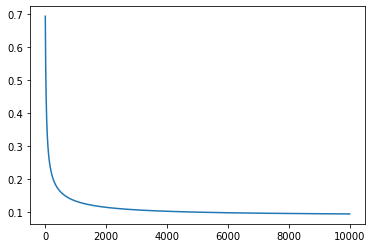

In [ ]:
regr = LogisticRegression()
losses = regr.fit(X, y)
plt.plot(losses)
plt.show()

Let's visually asses our model. We can do this by using our estimates for $a,b,c$.

<Figure size 792x792 with 0 Axes>

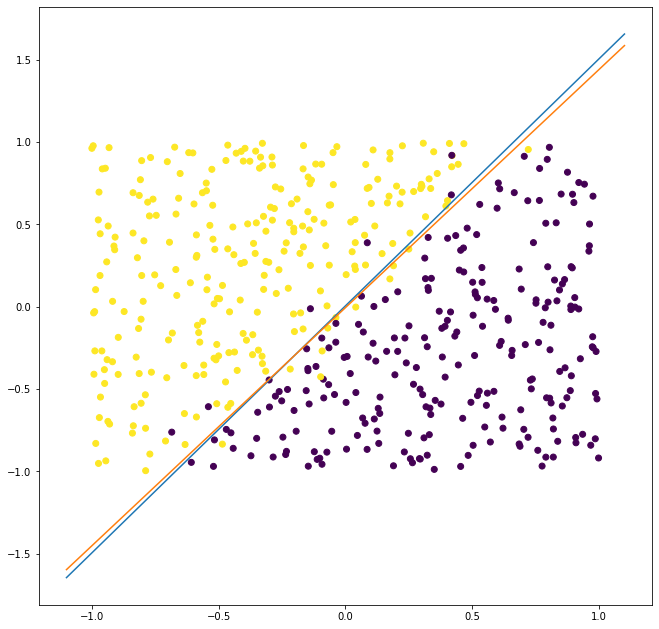

In [ ]:
plt.figure(figsize=(11,11))

[c, a, b] = regr._theta

lin_fun2 = get_y_fun(a, b, c)

_y2 = lin_fun2(_x)

plt.figure(figsize=(11,11))
plt.scatter(X[:, 0], X[: , 1], c=y)
plt.plot(_x, _y, _x, _y2)
plt.show()

Let's now complicate the things a little bit and make our next problem nonlinear.

In [ ]:
# Parameters of the ellipse
s1 = 1.
s2 = 2.
r = 0.75
m1 = 0.15
m2 = 0.125

# 1/0 mapping, checks whether we are inside the ellipse
def circle_rule(x, noise=0.):
    return int(s1 * (x[0] - m1) ** 2 + s2 * (x[1] - m2) ** 2 + noise < r ** 2.)

In [ ]:
# Training data

n = 500
range_points = 1

sigma = 0.1

X = np.array(range_points * 2 * (np.random.rand(n, 2) - 0.5))

y = np.array([circle_rule(x, sigma * np.random.normal()) for x in X])

print(X[:10])
print(y[:10])

[[ 0.18633789  0.87560968]
 [-0.81999293  0.61838609]
 [ 0.22604784  0.28001611]
 [ 0.9846182  -0.35783437]
 [-0.27962406  0.07170775]
 [ 0.2501677  -0.37650776]
 [ 0.41264707 -0.8357508 ]
 [-0.61039043 -0.97349628]
 [ 0.49924022  0.89579621]
 [ 0.537422   -0.65425777]]
[0 0 1 0 1 1 0 0 0 0]


Let's plot the data.

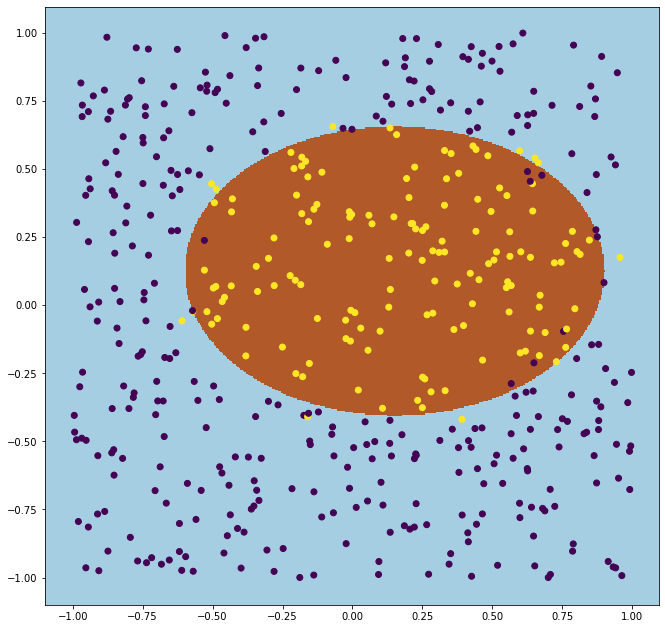

In [ ]:
range_plot = 1.1
h = .005

plt.figure(figsize=(11,11))

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
Z = np.array(list(map(circle_rule, np.c_[xx.ravel(), yy.ravel()])))

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)

Now, let's train a logistic regression model to tackle this problem. Note that we now need a nonlinear decision boundary. 

Hint: 
<sub><sup><sub><sup><sub><sup>
Use feature engineering.
</sup></sub></sup></sub></sup></sub>

In [ ]:
def prep_fe(X):
  X_fe = np.copy(X)
  for i in range(X.shape[1]):
   c = X[:, i]
   X_fe = np.c_[X_fe, c * c]

  return X_fe

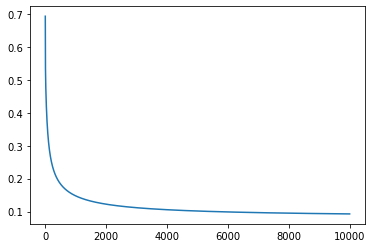

In [ ]:
X_fe = prep_fe(X)

losses = regr.fit(X_fe, y, alpha=0.9)
plt.plot(losses)
plt.show()

Let's visually asses our model. 

Contrary to the previous scenario, converting our weights to parameters of the ground truth curve may not be straightforward. It's easier to just provide predictions for a set of points in $R^2$.

In [ ]:
range_plot = 1.1
h = .005

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

print(X_plot)
print(X_plot.shape)

X_plot_fe = prep_fe(X_plot)

preds = regr.predict(X_plot_fe)

[[-1.1   -1.1  ]
 [-1.095 -1.1  ]
 [-1.09  -1.1  ]
 ...
 [ 1.085  1.095]
 [ 1.09   1.095]
 [ 1.095  1.095]]
(193600, 2)


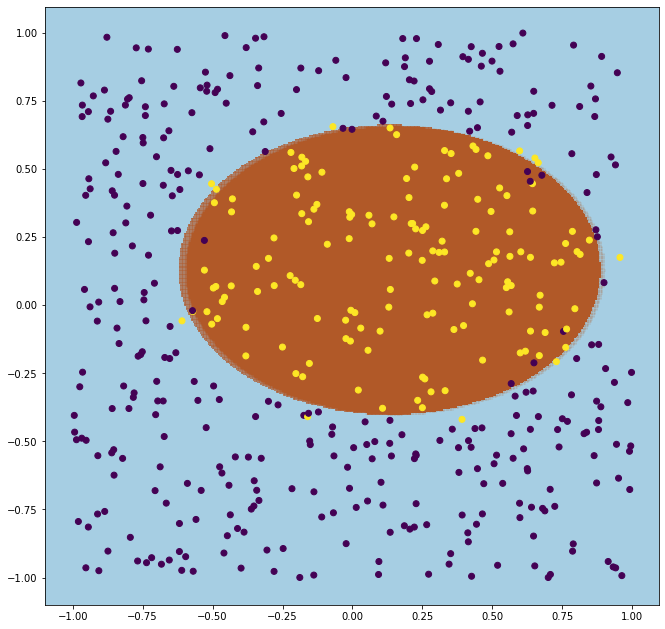

In [ ]:
plt.figure(figsize=(11,11))

Z = preds
Z = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

Z = np.array(list(map(circle_rule, X_plot)))
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.1, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y)